In [96]:
%matplotlib inline
# Dependencies and Setup
from matplotlib.legend_handler import HandlerPatch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches

In [97]:
# Files to Load
city_data ="C:\\Users\\taiwo\\OneDrive\\Desktop\\PREWORK_TO\\Module 5\\Resources\\city_data.csv"
ride_data ="C:\\Users\\taiwo\\OneDrive\\Desktop\\PREWORK_TO\\Module 5\\Resources\\ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)


In [70]:
# Merge the two datasets 
combined_data_df = pd.merge(city_data_df, ride_data_df, on='city', how="left")
combined_data_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [71]:
urban_data = combined_data_df[combined_data_df['type']=='Urban']
urban_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [72]:
suburban_data = combined_data_df[combined_data_df['type']=='Suburban']
suburban_data.head()

,city,driver_count,type,date,fare,ride_id
1625,Port Shane,7,Suburban,2018-04-09 15:34:40,27.66,4022340141966
1626,Port Shane,7,Suburban,2018-04-23 16:05:47,42.26,8341982666719
1627,Port Shane,7,Suburban,2018-03-02 12:06:00,14.95,2803204948363
1628,Port Shane,7,Suburban,2018-03-26 04:33:30,19.03,6010401984537
1629,Port Shane,7,Suburban,2018-03-15 12:09:42,31.58,2552978514662


In [73]:
rural_data = combined_data_df[combined_data_df['type']=='Rural']
rural_data.head()

,city,driver_count,type,date,fare,ride_id
2250,South Jennifer,7,Rural,2018-04-01 09:32:45,21.63,9135979586871
2251,South Jennifer,7,Rural,2018-03-07 19:10:13,48.79,9730627367446
2252,South Jennifer,7,Rural,2018-04-05 14:35:42,32.20,683983658392
2253,South Jennifer,7,Rural,2018-04-02 10:26:50,14.11,3828267773041
2254,South Jennifer,7,Rural,2018-04-10 20:46:11,43.25,623928772332


In [74]:
driver_data = combined_data_df[['driver_count']]
driver_data.head()

,driver_count
0,38
1,38
2,38
3,38
4,38


In [75]:
# Using .rename(columns={}) in order to rename columns
combined_data_df = combined_data_df.rename(columns={"type":"city_type"})
combined_data_df.head()

,city,driver_count,city_type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [76]:
# The total number of unique rides/cars
count_rides = combined_data_df["ride_id"].nunique()
count_rides

2375

In [77]:
# Using GroupBy in order to separate the data into fields according to "Urban City" values
urban_grouped_city_df = urban_data.groupby(['city','driver_count'])

# The object returned is a "GroupBy" object and cannot be viewed normally...
print(urban_grouped_city_df)

# In order to be visualized, a data function must be used...
# urban_grouped_city_df.count()

In [78]:
#Average fare per urban city
Average_fare_per_urban_city = urban_grouped_city_df[["fare"]].mean().round(2)
Average_fare_per_urban_city.head()

,,fare
city,driver_count,
Amandaburgh,12,24.64
Barajasview,26,25.33
Carriemouth,52,28.31
Christopherfurt,41,24.50
Deanville,49,25.84


In [79]:
#Driver Count per urban city
Driver_Count_per_urban_city = urban_grouped_city_df[["driver_count"]].mean().round(2)
z1 = Driver_Count_per_urban_city
z1.head()

,,driver_count
city,driver_count,
Amandaburgh,12,12
Barajasview,26,26
Carriemouth,52,52
Christopherfurt,41,41
Deanville,49,49


In [80]:
# Total No of Rides per urban city
rides_count_per_urban_city = urban_grouped_city_df[["ride_id"]].nunique()
rides_count_per_urban_city.head()

,,ride_id
city,driver_count,
Amandaburgh,12,18
Barajasview,26,22
Carriemouth,52,27
Christopherfurt,41,27
Deanville,49,19


In [81]:
# Using GroupBy in order to separate the data into fields according to "Suburban City" values
suburban_grouped_city_df = suburban_data.groupby(['city','driver_count'])

# The object returned is a "GroupBy" object and cannot be viewed normally...
print(suburban_grouped_city_df)

# In order to be visualized, a data function must be used...
# suburban_grouped_city_df.count()

In [82]:
#Average fare per suburban city
Average_fare_per_suburban_city = suburban_grouped_city_df[["fare"]].mean().round(2)
Average_fare_per_suburban_city.head()

,,fare
city,driver_count,
Barronchester,11,36.42
Bethanyland,22,32.96
Brandonfort,10,35.44
Colemanland,23,30.89
Davidfurt,23,32.00


In [83]:
#Driver Count per Suburban city
Driver_Count_per_suburban_city = suburban_grouped_city_df[["driver_count"]].mean().round(2)
z2 = Driver_Count_per_suburban_city
z2.head()


,,driver_count
city,driver_count,
Barronchester,11,11
Bethanyland,22,22
Brandonfort,10,10
Colemanland,23,23
Davidfurt,23,23


In [84]:
# Total No of Rides per suburban city
rides_count_per_suburban_city = suburban_grouped_city_df[["ride_id"]].nunique()
rides_count_per_suburban_city.head()

,,ride_id
city,driver_count,
Barronchester,11,16
Bethanyland,22,18
Brandonfort,10,19
Colemanland,23,22
Davidfurt,23,17


In [85]:
# Using GroupBy in order to separate the data into fields according to "Rural City" values
rural_grouped_city_df = rural_data.groupby(['city','driver_count'])

# The object returned is a "GroupBy" object and cannot be viewed normally...
print(rural_grouped_city_df)

# In order to be visualized, a data function must be used...
# rural_grouped_city_df.count()

In [86]:
#Average fare per rural city
Average_fare_per_rural_city = rural_grouped_city_df[["fare"]].mean().round(2)
Average_fare_per_rural_city.head()

,,fare
city,driver_count,
Bradshawfurt,7,40.06
Garzaport,7,24.12
Harringtonfort,4,33.47
Jessicaport,1,36.01
Lake Jamie,4,34.36


In [87]:
#Driver Count per Rural city
Driver_count_per_rural_city = rural_grouped_city_df[["driver_count"]].mean().round(2)
z3 = Driver_count_per_rural_city
z3.head()

,,driver_count
city,driver_count,
Bradshawfurt,7,7
Garzaport,7,7
Harringtonfort,4,4
Jessicaport,1,1
Lake Jamie,4,4


In [88]:
# Total No of Rides per rural city
rides_count_per_rural_city = rural_grouped_city_df[["ride_id"]].nunique()
rides_count_per_rural_city.head()

,,ride_id
city,driver_count,
Bradshawfurt,7,10
Garzaport,7,3
Harringtonfort,4,6
Jessicaport,1,6
Lake Jamie,4,6


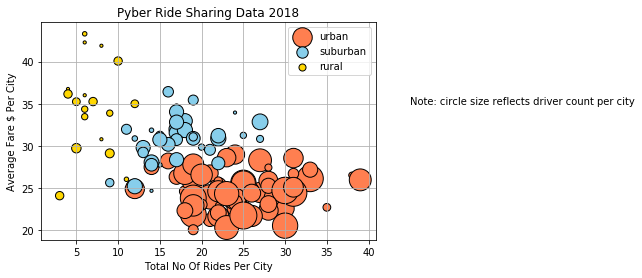

In [95]:
#define data
x1 = rides_count_per_urban_city['ride_id']
y1 = Average_fare_per_urban_city['fare']
z1 = Driver_Count_per_urban_city
x2 = rides_count_per_suburban_city['ride_id']
y2 = Average_fare_per_suburban_city['fare']
z2 = Driver_Count_per_suburban_city
x3 = rides_count_per_rural_city['ride_id']
y3 = Average_fare_per_rural_city['fare']
z3 = Driver_count_per_rural_city

plt.ylabel('Average Fare $ Per City')
plt.xlabel('Total No Of Rides Per City')
plt.title('Pyber Ride Sharing Data 2018')
plt.text(45,35,"Note: circle size reflects driver count per city")


plt.scatter(x1, y1, marker='o', label='urban', s=z1*10, c='coral' , alpha=1, edgecolors='black')
plt.scatter(x2, y2, marker='o', label='suburban', s=z2*10, c='skyblue', alpha=1, edgecolors='black')
plt.scatter(x3, y3, marker='o', label='rural', s=z3*10, c='gold', alpha=1, edgecolors='black')
# Plot legend.
plt.legend(loc="upper right", markerscale=1., scatterpoints=1, fontsize=10)
plt.grid(True)
plt.show()


In [56]:
# Using .rename(columns={}) in order to rename columns
combined_data_df = combined_data_df.rename(columns={"type":"city_type"})
combined_data_df.head()

,city,driver_count,city_type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [57]:
# Total No of Rides per City Type
total_rides_per_citytype = combined_data_df["city_type"].value_counts()
total_rides_per_citytype

Urban       1625
Suburban     625
Rural        125
Name: city_type, dtype: int64

(-1.1462471472214952,
 1.0857823755471938,
 -1.2154088386572095,
 1.1110419969545224)

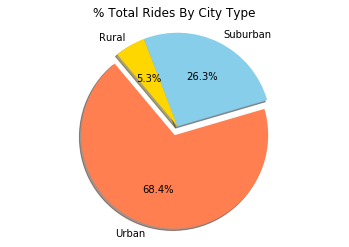

In [58]:
# %TOTAL RIDES BY CITY TYPES
city_type = ["Urban", "Suburban", "Rural"]
colors = ["coral","skyblue","gold"]
explode = (0.1,0,0)
title = "Total Rides By City Types"

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(total_rides_per_citytype, explode=explode, labels=city_type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=130)
plt.title("% Total Rides By City Type")
# Create axes which are equal so we have a perfect circle
plt.axis("equal")

In [59]:
# Using GroupBy in order to separate the data into fields according to "City Type" values
grouped_city_df = combined_data_df.groupby(['city_type'])

# The object returned is a "GroupBy" object and cannot be viewed normally...
print(grouped_city_df)

# In order to be visualized, a data function must be used...
# grouped_city_df.sum()

In [60]:
# Total fares by City Type
total_fares_per_citytype = grouped_city_df[["fare"]].sum()
total_fares_per_citytype

,fare
city_type,
Rural,4327.93
Suburban,19356.33
Urban,39854.38


(-1.1211543472819667,
 1.2907424947344492,
 -1.1146562060416572,
 1.208924787416114)

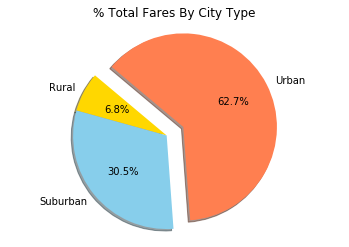

In [61]:
# %TOTAL FARES BY CITY TYPES
city_type = ["Rural", "Suburban", "Urban"]
colors = ["gold","skyblue","coral"]
explode = (0,0,0.2)
title = "% Total Fares By City Types"

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(total_fares_per_citytype['fare'], explode=explode, colors=colors, labels=city_type,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("% Total Fares By City Type")
# Create axes which are equal so we have a perfect circle
plt.axis("equal")

In [62]:
#Drivers per urban city
Driver_count_per_urban_city = urban_grouped_city_df[["driver_count"]].mean()
Driver_count_per_urban_city.head()

,,driver_count
city,driver_count,
Amandaburgh,12,12
Barajasview,26,26
Carriemouth,52,52
Christopherfurt,41,41
Deanville,49,49


In [63]:
#Drivers per suburban city
Driver_count_per_suburban_city = suburban_grouped_city_df[["driver_count"]].mean()
Driver_count_per_suburban_city.head()

,,driver_count
city,driver_count,
Barronchester,11,11
Bethanyland,22,22
Brandonfort,10,10
Colemanland,23,23
Davidfurt,23,23


In [64]:
#Drivers per rural city
Driver_count_per_rural_city = rural_grouped_city_df[["driver_count"]].mean()
Driver_count_per_rural_city.head()

,,driver_count
city,driver_count,
Bradshawfurt,7,7
Garzaport,7,7
Harringtonfort,4,4
Jessicaport,1,1
Lake Jamie,4,4


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


(-1.078139975069418,
 1.1298230339238875,
 -1.2058291003063968,
 1.120524166169238)

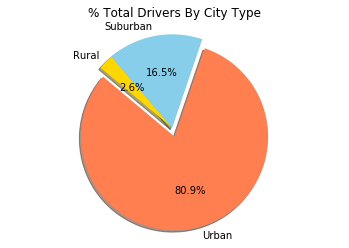

In [65]:
# %Total Drivers By City Type
labels = ["Urban", "Suburban", "Rural"]

index=['Urban', 'Suburban', 'Rural']

# The values of each section of the pie chart
sizes = [(Driver_count_per_urban_city.sum()),
         (Driver_count_per_suburban_city.sum()),
         Driver_count_per_rural_city.sum()]

# The colors of each section of the pie chart
colors = ["coral","skyblue","gold"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(sizes, explode=explode, colors=colors, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140)

plt.title("% Total Drivers By City Type")

plt.axis("equal")


In [66]:
# OBSERVABLE TRENDS
#1. The pie charts show that urban cities have the highest percentages of total drivers, total fares and total number of rides followed by suburban & rural cities respectively
#2. From the scatterplot, average fares are highest in rural cities compared to suburban & urban cities. This would be due to its lowest number of rides.
#3. Whilst the driver counts in the urban cities far outweighs their total number of rides, it is reverse with the other city-types i.e. the suburban & rural cities have more rides than drivers.